In [ ]:
# Attention 라이브러리 추가
!pip install attention

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눔
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# 단어 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [ ]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0,5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0,5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 현재 설정된 모델 구조 보기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         2500000   
                                                                 
 dropout (Dropout)           (None, None, 500)         0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          144640    
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0

In [ ]:
# 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습의 조기중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# 모델 실행
# history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/100
625/625 [==============================] - 500s 800ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.7988 - val_accuracy: 0.8682
Epoch 2/100
625/625 [==============================] - 430s 688ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.7941 - val_accuracy: 0.8650
Epoch 3/100
625/625 [==============================] - 430s 689ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.7580 - val_accuracy: 0.8728
Epoch 4/100
625/625 [==============================] - 431s 690ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.7057 - val_accuracy: 0.8696
Epoch 5/100
625/625 [==============================] - 430s 687ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.7396 - val_accuracy: 0.8658
Epoch 6/100
625/625 [==============================] - 432s 691ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.7388 - val_accuracy: 0.8635
Epoch 7/100
625/625 [==============================] - 430s 689ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 89s 113ms/step - loss: 0.7478 - accuracy: 0.8687

 Test Accuracy: 0.8687


In [ ]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

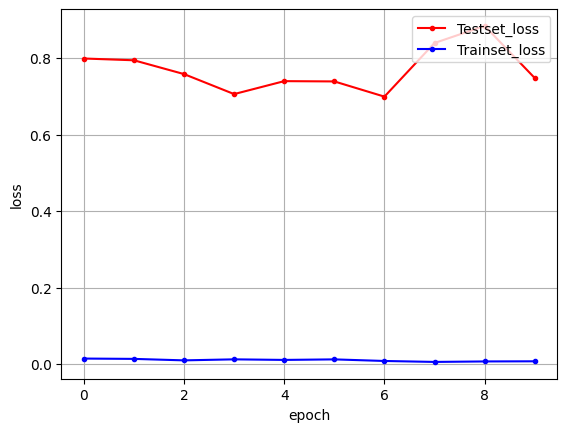

In [ ]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그리드, 레이블 추가
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 결론

*   Attention 신경망의 정확도는 86.79%임.
*   이전에 LSTM과 RNN의 조합 정확도는 87.50%이었음.
*   교재 상에는 Attention 신경망의 정확도가 상승하지만, 나는 같은 결과가 나오지 않은 것으로 미루어 보아, Attention 신경망이 항상 높은 정확성을 가지지는 않는 것으로 추정.


